##### Pemodelan Prediksi Cool & Warm by Season menggunakan RNN

In [1]:
# Mengimport Pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Membaca Data
df=pd.read_excel('data c&w.xlsx')

In [3]:
# Menampilkan 5 data terbawah
df.tail()

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
70,2020,0.5,0.5,0.4,0.2,-0.1,-0.3,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2
71,2021,-1.0,-0.9,-0.8,-0.7,-0.5,-0.4,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0
72,2022,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8
73,2023,-0.7,-0.4,-0.1,0.2,0.5,0.8,1.1,1.3,1.6,1.8,1.9,2.0
74,2024,1.8,1.5,1.1,0.7,0.4,0.2,0.0,-0.1,NaN,NaN,NaN,NaN


In [4]:
# Menghapus nilai yang mengandung NaN
df.dropna(inplace=True)

In [5]:
df.tail()

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
69,2019,0.7,0.7,0.7,0.7,0.5,0.5,0.3,0.1,0.2,0.3,0.5,0.5
70,2020,0.5,0.5,0.4,0.2,-0.1,-0.3,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2
71,2021,-1.0,-0.9,-0.8,-0.7,-0.5,-0.4,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0
72,2022,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8
73,2023,-0.7,-0.4,-0.1,0.2,0.5,0.8,1.1,1.3,1.6,1.8,1.9,2.0


In [6]:
# Mengganti nama variabel
cols = ['Year','Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']

df.columns = cols
df.head()

,Year,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,1950,-1.5,-1.3,-1.2,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8
1,1951,-0.8,-0.5,-0.2,0.2,0.4,0.6,0.7,0.9,1.0,1.2,1.0,0.8
2,1952,0.5,0.4,0.3,0.3,0.2,0.0,-0.1,0.0,0.2,0.1,0.0,0.1
3,1953,0.4,0.6,0.6,0.7,0.8,0.8,0.7,0.7,0.8,0.8,0.8,0.8
4,1954,0.8,0.5,0.0,-0.4,-0.5,-0.5,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7


In [7]:
df.set_index('Year', inplace = True)

In [8]:
data=df.transpose()

In [9]:
data.head()

Year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Januari,-1.5,-0.8,0.5,0.4,0.8,-0.7,-1.1,-0.2,1.8,0.6,...,-0.4,0.5,2.5,-0.3,-0.9,0.7,0.5,-1.0,-1.0,-0.7
Februari,-1.3,-0.5,0.4,0.6,0.5,-0.6,-0.8,0.1,1.7,0.6,...,-0.5,0.5,2.1,-0.2,-0.9,0.7,0.5,-0.9,-0.9,-0.4
Maret,-1.2,-0.2,0.3,0.6,0.0,-0.7,-0.6,0.4,1.3,0.5,...,-0.3,0.5,1.6,0.1,-0.7,0.7,0.4,-0.8,-1.0,-0.1
April,-1.2,0.2,0.3,0.7,-0.4,-0.8,-0.5,0.7,0.9,0.3,...,0.0,0.7,0.9,0.2,-0.5,0.7,0.2,-0.7,-1.1,0.2
Mei,-1.1,0.4,0.2,0.8,-0.5,-0.8,-0.5,0.9,0.7,0.2,...,0.2,0.9,0.4,0.3,-0.2,0.5,-0.1,-0.5,-1.0,0.5


In [10]:
dates = pd.date_range(start = '1950-01', freq = 'MS', periods = len(data.columns)*12)
dates

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', length=888, freq='MS')

In [11]:
shape= df.shape

In [12]:
data=df.to_numpy()

In [13]:
dataa=data.reshape((shape[0] * shape[1], 1))

In [14]:
data_oke = pd.DataFrame({'Mean' : dataa[:,0]})
data_oke.set_index(dates, inplace=True)

Text(0, 0.5, 'Mean across Month')

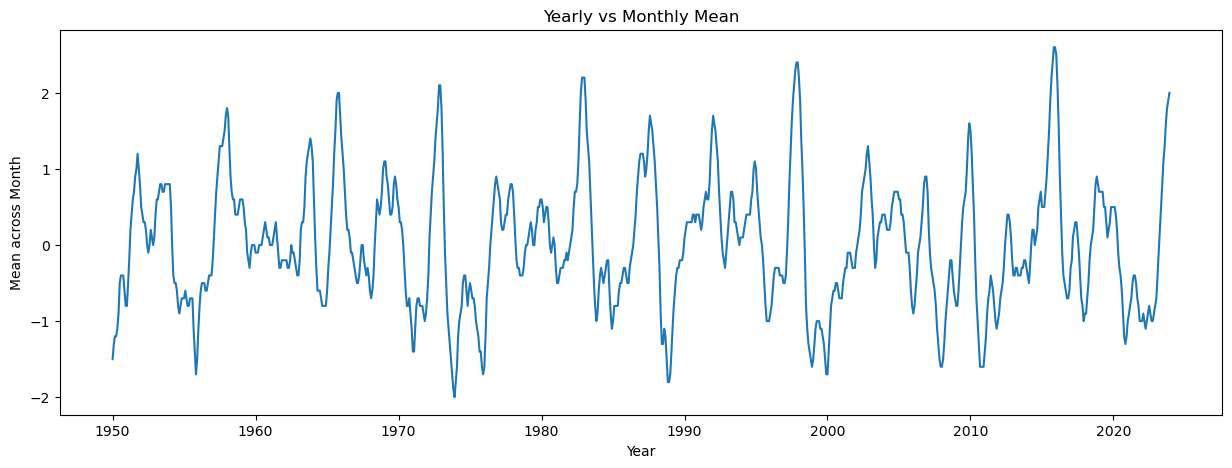

In [15]:
plt.figure(figsize = (15,5))
plt.plot(data_oke.index, data_oke['Mean'])
plt.title('Yearly vs Monthly Mean')
plt.xlabel('Year')
plt.ylabel('Mean across Month')

In [16]:
dataset=data_oke.values

In [17]:
! pip install attention

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
from attention import Attention

np.random.seed(100)

In [19]:
train= dataset[0:710,:]
test=dataset[710:,:]

In [20]:
print("Original data shape:",dataset.shape)
print("Train shape:",train.shape)
print("Test shape:",test.shape)

Original data shape: (888, 1)
Train shape: (710, 1)
Test shape: (178, 1)


In [21]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data.shape

(888, 1)

In [22]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
x_train.shape

(650, 60)

In [24]:
y_train.shape

(650,)

In [25]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [26]:
inputs = data_oke[len(df) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [27]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [28]:
y_test = inputs[60:,0]

In [29]:
x_train = x_train[:, 0:1].reshape(x_train.shape[0], 1, 1)
x_test = X_test[:, 0:1].reshape(X_test.shape[0], 1, 1)

model=Sequential()
model.add(SimpleRNN(9, input_shape=(1, 1)))
model.add(Dense(1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 9)                 99        
                                                                 
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 109 (436.00 Byte)
Trainable params: 109 (436.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model.fit(x_train, y_train, epochs=500, batch_size=256)

Epoch 1/500

3/3 [==============================] - 1s 8ms/step - loss: 0.4136
Epoch 2/500
3/3 [==============================] - 0s 298us/step - loss: 0.3826
Epoch 3/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3531
Epoch 4/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3250
Epoch 5/500
3/3 [==============================] - 0s 24ms/step - loss: 0.2984
Epoch 6/500
3/3 [==============================] - 0s 0s/step - loss: 0.2732
Epoch 7/500
3/3 [==============================] - 0s 0s/step - loss: 0.2496
Epoch 8/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2275
Epoch 9/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2069
Epoch 10/500
3/3 [==============================] - 0s 0s/step - loss: 0.1878
Epoch 11/500
3/3 [==============================] - 0s 0s/step - loss: 0.1701
Epoch 12/500
3/3 [==============================] - 0s 373us/step - loss: 0.1540
Epoch 13/500
3/3 [==============================] - 0s 8ms/

In [42]:
# Prediksi Data RNN
y_pred= model.predict(x_test)

4/4 [==============================] - 0s 1ms/step


##### Evaluasi model

In [32]:
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score, math.sqrt(train_score)))
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (test_score, math.sqrt(test_score)))

Train Score: 0.03 MSE (0.18 RMSE)
Test Score: 0.05 MSE (0.22 RMSE)


In [45]:
r2 = r2_score(y_test, y_pred)
print('R² Score: %.2f' % r2)

R² Score: -0.05
